In [1]:
from codebase import *


def complete_wprp_dictionary(data1f, data2f, random1f, random2f, zmin, zmax, fit_inds, randmult = 20.,
                        pimax = 60, nbins = 12, rmin = 0.1, rmax = 40., nthreads = 10,  nside_box = 5, bgal = None, 
                        save = False, savedir = './'):

    temp_dict = full_calculation_plus_error_dictionary( data1f, data2f, random1f, random2f, zmin = zmin, zmax = zmax, randmult = randmult,
                        pimax = pimax, nbins = nbins, rmin = rmin, rmax = rmax, nthreads = nthreads,  nside_box = nside_box)
    
    out = bias_fitting(temp_dict, fit_inds)
    out['dof'] = len(fit_inds) - 1  # Number of data points being fit -1 fitting parameter

    if data1f != data2f:
        if bgal == None:
            print('If you are calculating a cross correlation, provide the bgal of the tracer. Halo masses were not calculated.')
        else:
            out= fix_masses_to_Tinker2010_local(out, bgal)

    return out

    

In [2]:
# Define the Radial Bins
bins = np.logspace(np.log10(0.1), np.log10(40), 12 + 1)

fit_inds = np.arange(len(bins))[5:-1] #1.2 Mpc/h onwards
fit_inds,  bins[fit_inds]

(array([ 5,  6,  7,  8,  9, 10, 11]),
 array([ 1.21392446,  2.        ,  3.29509794,  5.42883523,  8.94427191,
        14.73612599, 24.27848924]))

# Data 

In [3]:
data1f = 'zall-pix-fuji_GAMA10h_strict.fits'
random1f = 'randoms_GAMA10h_strict_S20A_r24_photoz_specz_fdfc_masks_seed1234567.fits'

data = Table.read(data1f)
randoms = Table.read(random1f)

Text(0.5, 0, 'R.A.')

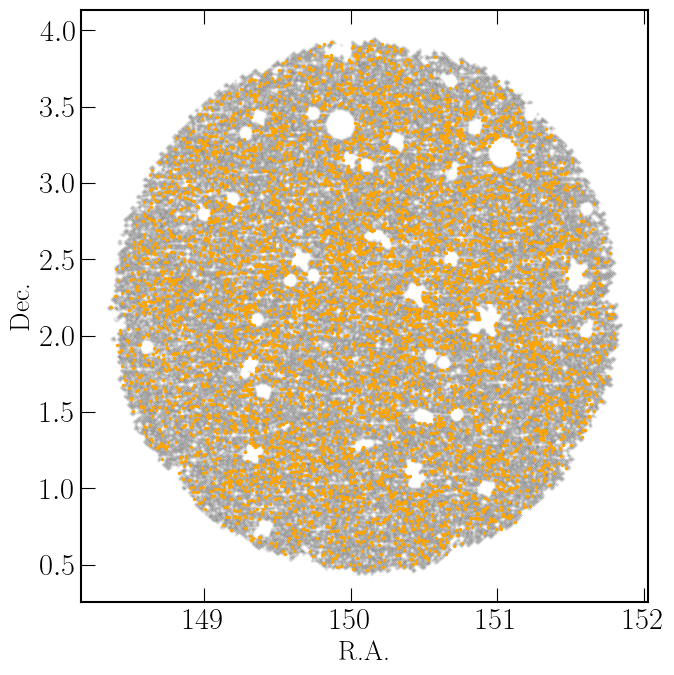

In [4]:
# Give ourselves a quick view of the data from the DESI EDR

plt.figure(figsize = (7,7))
plt.scatter(randoms['RA'], randoms['DEC'], s = 0.001, color = 'black', alpha= 0.1)
plt.scatter(data['RA'], data['DEC'], s = 2, color = 'orange')
plt.ylabel('Dec.')
plt.xlabel('R.A.')

# Correlation Analysis

In [5]:
zmin = 0.5
zmax = 1.0

LRG_Auto_10h= complete_wprp_dictionary(data1f, data1f, random1f, random1f, zmin, zmax, fit_inds, randmult= 10., bgal = None)


5108 51080 5108 51080


/Users/rodrigoc/opt/anaconda3/envs/clustering-tutorial/lib/python3.13/site-packages/Corrfunc/utils.py:918: UserWarning: One or more input array has non-native endianness!  A copy will be made with the correct endianness.
  warnings.warn("One or more input array has non-native endianness!  A copy will"\


[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[2]
[2]
[2]
[2]
[3]
[3]
[3]
[3]
[4]
[4]
[4]
[4]
[5]
[5]
[5]
[5]
[6]
[6]
[6]
[6]
[7]
[7]
[7]
[7]
[8]
[8]
[8]
[8]
[9]
[9]
[9]
[9]
[10]
[10]
[10]
[10]
[11]
[11]
[11]
[11]
[12]
[12]
[12]
[12]
[13]
[13]
[13]
[13]
[14]
[14]
[14]
[14]
[15]
[15]
[15]
[15]
[16]
[16]
[16]
[16]
[17]
[17]
[17]
[17]
[18]
[18]
[18]
[18]
[19]
[19]
[19]
[19]
[20]
[20]
[20]
[20]
[21]
[21]
[21]
[21]
[22]
[22]
[22]
[22]
[23]
[23]
[23]
[23]
[24]
[24]
[24]
[24]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:16<00:00,  1.36s/it]


# Plot Results

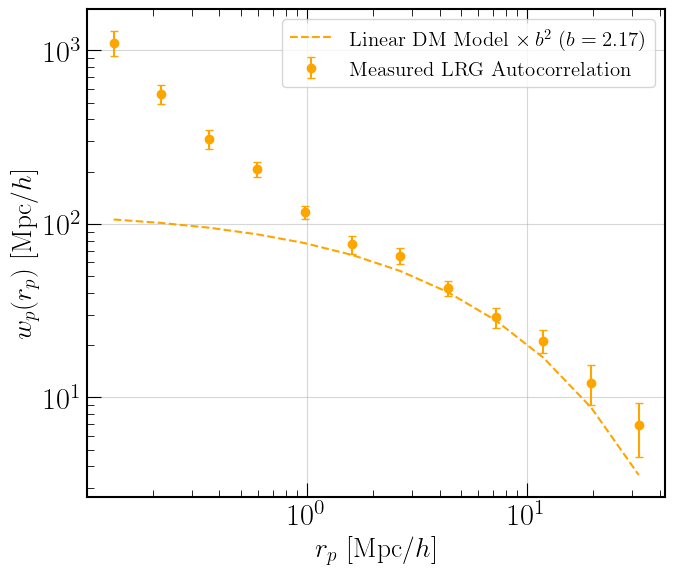

In [23]:
plt.figure(figsize = (7,6))

plt.errorbar(LRG_Auto_10h['rp'], LRG_Auto_10h['wp'], yerr = LRG_Auto_10h['error'], fmt = 'o', capsize = 3, color = 'orange', 
             label = 'Measured LRG Autocorrelation')
plt.plot(LRG_Auto_10h['rp'], LRG_Auto_10h['model']*LRG_Auto_10h['b2_fit'][0], ls = '--', color = 'orange', 
         label = rf'Linear DM Model $\times\, b^2 \,\, (b = {{:.2f}})$'.format(LRG_Auto_10h['b2_fit'][0]**0.5))

plt.loglog()
plt.xlabel(r'$r_p$ [Mpc/$h$]')
plt.ylabel(r'$w_p(r_p)$ [Mpc/$h$]')
plt.grid(alpha= 0.5)
plt.legend()



# How about we also try this out with ELGs

Text(0.5, 0, 'R.A.')

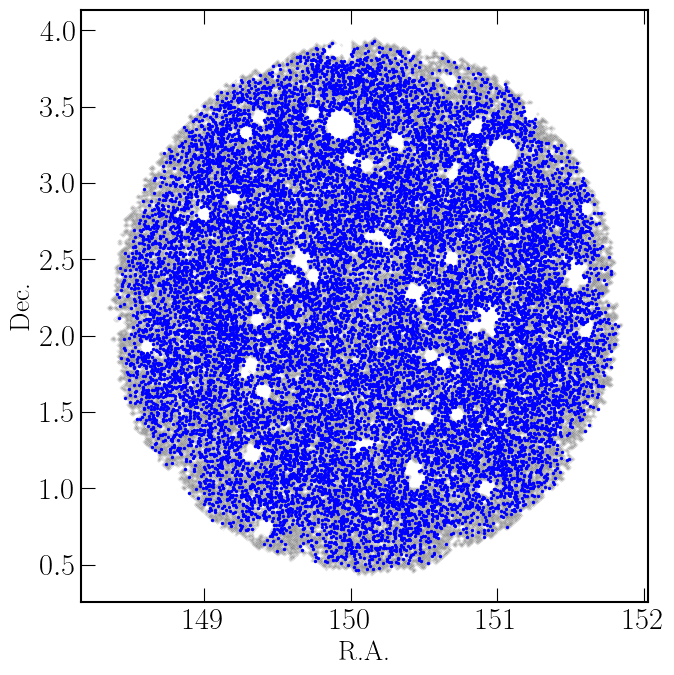

In [25]:
data1f = 'DESI_EDR_ELGs_GAMA10h.fits'
data = Table.read(data1f)
# Give ourselves a quick view of the data from the DESI EDR

plt.figure(figsize = (7,7))
plt.scatter(randoms['RA'], randoms['DEC'], s = 0.001, color = 'black', alpha= 0.1)
plt.scatter(data['RA'], data['DEC'], s = 2, color = 'b')
plt.ylabel('Dec.')
plt.xlabel('R.A.')

In [ ]:
zmin = 0.5
zmax = 1.0


ELG_Auto_10h= complete_wprp_dictionary(data1f, data1f, random1f, random1f, zmin, zmax, fit_inds, randmult= 10., bgal = None)


In [ ]:
plt.figure(figsize = (7,6))

plt.errorbar(LRG_Auto_10h['rp'], LRG_Auto_10h['wp'], yerr = LRG_Auto_10h['error'], fmt = 'o', capsize = 3, color = 'orange', 
             label = 'Measured LRG Autocorrelation')
plt.plot(LRG_Auto_10h['rp'], LRG_Auto_10h['model']*LRG_Auto_10h['b2_fit'][0], ls = '--', color = 'orange', 
         label = rf'Linear DM Model $\times\, b^2 \,\, (b = {{:.2f}})$'.format(LRG_Auto_10h['b2_fit'][0]**0.5))

plt.errorbar(ELG_Auto_10h['rp'], ELG_Auto_10h['wp'], yerr = ELG_Auto_10h['error'], fmt = 'o', capsize = 3, color = 'b', 
             label = 'Measured ELG Autocorrelation')
plt.plot(ELG_Auto_10h['rp'], ELG_Auto_10h['model']*ELG_Auto_10h['b2_fit'][0], ls = '--', color = 'b', 
         label = rf'Linear DM Model $\times\, b^2 \,\, (b = {{:.2f}})$'.format(ELG_Auto_10h['b2_fit'][0]**0.5))


plt.loglog()
plt.xlabel(r'$r_p$ [Mpc/$h$]')
plt.ylabel(r'$w_p(r_p)$ [Mpc/$h$]')
plt.grid(alpha= 0.5)
plt.legend()

